<a href="https://colab.research.google.com/github/Igorgodoi/tccpucminas/blob/master/TCCMINAS_Tratamento_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Autor: Igor Reis de Godoi
# TCC PUCMINAS 2020 - Predição da duração de uma audiência trabalhista
# 
# Importando bibliotecas

In [1]:
!pip install -U pandas-profiling

     |████████████████████████████████| 266kB 5.3MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 3.1MB 22.7MB/s 
     |████████████████████████████████| 604kB 45.1MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 296kB 44.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=b31c0c9e16cda58d30ccd07a52d451884913221bf876971691a250948a931b88
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=10a8d2583a251a18526108b17abdb8e20f8fabe87b0f59a167cdde0c0a467e07
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

In [1]:
from pandas_profiling import ProfileReport
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importando o dataset de municípios
drive.mount('/content/drive')
df_municipio = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/municipios.csv',sep=';')
df_municipio.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,UF,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,COD MUNICIPIO
0,RO,Alta Floresta D'Oeste,22945,1100015
1,RO,Ariquemes,107863,1100023
2,RO,Cabixi,5312,1100031
3,RO,Cacoal,85359,1100049
4,RO,Cerejeiras,16323,1100056


In [3]:
# Importando o dataset de audiências
df_audiencia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/dataset_audiencias.csv',sep=';',error_bad_lines=False)
df_audiencia.head()

,id_processo_trf,vara_trabalho,classe_processual,juiz,tipo_audiencia,dt_inicio_programada,dt_fim_programada,duracao_programada_minutos,marcacao_automatica,hora_abertura,hora_encerramento,data_audiencia,dia_semana,sala_audiencia,municipio,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,assunto_pai,autor,tipo_documento_autor,reu,tipo_documento_reu,duracao_audiencia
0,671305,22,ATOrd,63664,6,04/12/2019 10:00,04/12/2019 10:00,0.0,0,11:07,11:26,04/12/2019,4,36,4118204.0,0,30000.00,0,0,0,0,1005.0,4756,4538,257312,CPF,134374,CPJ,19
1,100544,122,ATOrd,146366,6,10/12/2018 09:00,10/12/2018 09:00,0.0,0,08:00,08:07,10/12/2018,2,67,4125506.0,0,30000.00,0,1,0,0,101.0,4766,4537,150053,CPF,82241,CPJ,7
2,591776,84,ATOrd,195471,3,23/01/2018 14:20,23/01/2018 14:20,0.0,0,13:17,13:22,23/01/2018,3,104,4106902.0,0,38000.00,0,1,0,1,1202.0,1495,1498,417767,CPF,63376,CPJ,5
3,718589,84,ATOrd,195471,3,13/12/2018 15:00,13/12/2018 15:00,0.0,0,13:54,13:56,13/12/2018,5,104,4106902.0,1,1488661.41,0,1,0,1,402.0,4957,4756,674719,CPF,110935,CPJ,2
4,718589,84,ATOrd,195471,3,13/12/2018 15:00,13/12/2018 15:00,0.0,0,13:54,13:56,13/12/2018,5,104,4106902.0,1,1488661.41,0,1,0,1,402.0,4957,4756,674719,CPF,110935,CPJ,2


In [ ]:
# Análise exploratória Municípios
profileMunicipio = ProfileReport(df_municipio, title='Municipios',html={'style':{'full_width':True}})

profileMunicipio.to_notebook_iframe()

In [ ]:
# Análise exploratória Audiências
profile_audiencia = ProfileReport(df_audiencia, title='Audiência',html={'style':{'full_width':True}})
profile_audiencia.to_notebook_iframe()

In [4]:
# Eliminando duplicados
df_audiencia=df_audiencia.drop_duplicates()
df_audiencia.count()

id_processo_trf               287455
vara_trabalho                 287455
classe_processual             287455
juiz                          287455
tipo_audiencia                287455
dt_inicio_programada          287455
dt_fim_programada             287454
duracao_programada_minutos    287454
marcacao_automatica           287455
hora_abertura                 287455
hora_encerramento             287455
data_audiencia                287455
dia_semana                    287455
sala_audiencia                287455
municipio                     287454
apos_reforma_trabalhista      287455
valor_causa                   287455
segredo_justica               287455
justica_gratuita              287455
tutela_liminar                287455
prioridade                    287455
atividade_economica           287454
assunto                       287455
assunto_pai                   287455
autor                         287455
tipo_documento_autor          287455
reu                           287455
t

In [5]:
# Eliminando as colunas id_processo_trf, dt_fim_programada e duracao_programada_minutos
df_audiencia=df_audiencia.drop(['id_processo_trf','dt_fim_programada', 'duracao_programada_minutos'], axis=1)

In [6]:
df_audiencia.head()

,vara_trabalho,classe_processual,juiz,tipo_audiencia,dt_inicio_programada,marcacao_automatica,hora_abertura,hora_encerramento,data_audiencia,dia_semana,sala_audiencia,municipio,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,assunto_pai,autor,tipo_documento_autor,reu,tipo_documento_reu,duracao_audiencia
0,22,ATOrd,63664,6,04/12/2019 10:00,0,11:07,11:26,04/12/2019,4,36,4118204.0,0,30000.00,0,0,0,0,1005.0,4756,4538,257312,CPF,134374,CPJ,19
1,122,ATOrd,146366,6,10/12/2018 09:00,0,08:00,08:07,10/12/2018,2,67,4125506.0,0,30000.00,0,1,0,0,101.0,4766,4537,150053,CPF,82241,CPJ,7
2,84,ATOrd,195471,3,23/01/2018 14:20,0,13:17,13:22,23/01/2018,3,104,4106902.0,0,38000.00,0,1,0,1,1202.0,1495,1498,417767,CPF,63376,CPJ,5
3,84,ATOrd,195471,3,13/12/2018 15:00,0,13:54,13:56,13/12/2018,5,104,4106902.0,1,1488661.41,0,1,0,1,402.0,4957,4756,674719,CPF,110935,CPJ,2
5,95,ATOrd,159507,9,12/12/2018 09:55,0,09:04,09:18,12/12/2018,4,179,4108304.0,0,90000.00,0,0,0,0,1005.0,4539,1518,529888,CPF,305012,CPJ,14


In [7]:
# Eliminado missing values
df_audiencia=df_audiencia.dropna()

In [8]:
df_audiencia.head()

,vara_trabalho,classe_processual,juiz,tipo_audiencia,dt_inicio_programada,marcacao_automatica,hora_abertura,hora_encerramento,data_audiencia,dia_semana,sala_audiencia,municipio,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,assunto_pai,autor,tipo_documento_autor,reu,tipo_documento_reu,duracao_audiencia
0,22,ATOrd,63664,6,04/12/2019 10:00,0,11:07,11:26,04/12/2019,4,36,4118204.0,0,30000.00,0,0,0,0,1005.0,4756,4538,257312,CPF,134374,CPJ,19
1,122,ATOrd,146366,6,10/12/2018 09:00,0,08:00,08:07,10/12/2018,2,67,4125506.0,0,30000.00,0,1,0,0,101.0,4766,4537,150053,CPF,82241,CPJ,7
2,84,ATOrd,195471,3,23/01/2018 14:20,0,13:17,13:22,23/01/2018,3,104,4106902.0,0,38000.00,0,1,0,1,1202.0,1495,1498,417767,CPF,63376,CPJ,5
3,84,ATOrd,195471,3,13/12/2018 15:00,0,13:54,13:56,13/12/2018,5,104,4106902.0,1,1488661.41,0,1,0,1,402.0,4957,4756,674719,CPF,110935,CPJ,2
5,95,ATOrd,159507,9,12/12/2018 09:55,0,09:04,09:18,12/12/2018,4,179,4108304.0,0,90000.00,0,0,0,0,1005.0,4539,1518,529888,CPF,305012,CPJ,14


In [9]:
df_audiencia.count()

vara_trabalho               287454
classe_processual           287454
juiz                        287454
tipo_audiencia              287454
dt_inicio_programada        287454
marcacao_automatica         287454
hora_abertura               287454
hora_encerramento           287454
data_audiencia              287454
dia_semana                  287454
sala_audiencia              287454
municipio                   287454
apos_reforma_trabalhista    287454
valor_causa                 287454
segredo_justica             287454
justica_gratuita            287454
tutela_liminar              287454
prioridade                  287454
atividade_economica         287454
assunto                     287454
assunto_pai                 287454
autor                       287454
tipo_documento_autor        287454
reu                         287454
tipo_documento_reu          287454
duracao_audiencia           287454
dtype: int64

In [ ]:
profile_audiencia = ProfileReport(df_audiencia, title='Audiência',html={'style':{'full_width':True}})
profile_audiencia.to_notebook_iframe()

In [ ]:
# Eliminado registros com duração negativas
df_audiencia.duracao_audiencia.count()

In [10]:
df_audiencia_filtrada=df_audiencia.query('duracao_audiencia > 0')

In [11]:
df_audiencia_filtrada.duracao_audiencia.count()

271349

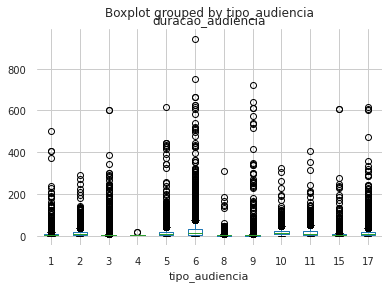

In [12]:
df_audiencia_filtrada.boxplot(column='duracao_audiencia', by='tipo_audiencia')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ab25b4fd0>]],
      dtype=object)

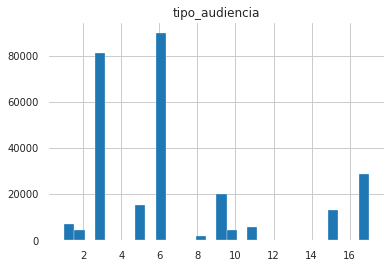

In [13]:
df_audiencia_filtrada.hist(column='tipo_audiencia', bins=30)

In [14]:
df_audiencia_filtrada.tipo_audiencia.value_counts()

6     89744
3     81319
17    28663
9     20050
5     15100
15    13057
1      7085
11     5560
10     4526
2      4420
8      1806
4        19
Name: tipo_audiencia, dtype: int64

In [15]:
df_audiencia_filtrada.groupby(by='tipo_audiencia').duracao_audiencia.describe()

,count,mean,std,min,25%,50%,75%,max
tipo_audiencia,,,,,,,,
1,7085.0,7.788709,15.967060,1.0,2.0,4.0,8.0,500.0
2,4420.0,14.408824,22.505649,1.0,3.0,7.0,16.0,291.0
3,81319.0,5.030411,8.889413,1.0,2.0,3.0,5.0,602.0
4,19.0,4.526316,4.857622,2.0,2.0,3.0,4.0,19.0
5,15100.0,14.612384,22.563020,1.0,3.0,7.0,18.0,618.0
6,89744.0,24.519065,27.979765,1.0,6.0,15.0,34.0,941.0
8,1806.0,4.042636,12.080655,1.0,1.0,2.0,4.0,312.0
9,20050.0,4.226185,16.228881,1.0,1.0,2.0,4.0,722.0
10,4526.0,18.330977,17.417513,1.0,8.0,15.0,24.0,326.0


In [16]:
df_audiencia_filtrada.groupby(by='tipo_audiencia').duracao_audiencia.mean()

tipo_audiencia
1      7.788709
2     14.408824
3      5.030411
4      4.526316
5     14.612384
6     24.519065
8      4.042636
9      4.226185
10    18.330977
11    16.727518
15     5.968906
17    13.469107
Name: duracao_audiencia, dtype: float64

In [ ]:
# continuar.
# eliminar outliers
# eliminar audiência de julgamento
# agrupar tipos de audiências análogos
# join com municipio
# calcular atraso

In [ ]:
profile_audiencia_filtrada = ProfileReport(df_audiencia_filtrada, title='Audiência',html={'style':{'full_width':True}})
profile_audiencia_filtrada.to_notebook_iframe()

In [ ]:
df_audiencia_filtrada.groupby(by='tipo_audiencia').duracao_audiencia.mean()

In [17]:
corte_por_tipo_audiencia=(df_audiencia_filtrada.groupby(by='tipo_audiencia').duracao_audiencia.quantile(0.75) - df_audiencia_filtrada.groupby(by='tipo_audiencia').duracao_audiencia.quantile(0.25)) * 3.0 + df_audiencia_filtrada.groupby(by='tipo_audiencia').duracao_audiencia.quantile(0.75)

In [ ]:
corte_por_tipo_audiencia

In [ ]:
corte_por_tipo_audiencia.shape

In [ ]:
corte_por_tipo_audiencia.head()

In [18]:
df_resultado = pd.merge(corte_por_tipo_audiencia,df_audiencia_filtrada,on='tipo_audiencia')

In [ ]:
df_resultado.tail(100)

In [19]:
condicao = df_resultado[df_resultado['duracao_audiencia_x']<df_resultado['duracao_audiencia_y']].index
df_resultado.drop(condicao,inplace=True)

In [20]:
condicao = df_resultado[df_resultado['tipo_audiencia']==4].index
df_resultado.drop(condicao,inplace=True)

In [ ]:
df_resultado.count()

In [21]:
df_resultado.groupby(by='tipo_audiencia').duracao_audiencia_y.describe()

,count,mean,std,min,25%,50%,75%,max
tipo_audiencia,,,,,,,,
1,6793.0,5.734580,5.138088,1.0,2.0,4.0,8.0,26.0
2,4212.0,10.375594,10.475966,1.0,3.0,6.0,14.0,55.0
3,76918.0,3.727996,2.834248,1.0,2.0,3.0,5.0,14.0
5,14649.0,11.980408,13.038367,1.0,3.0,7.0,16.0,63.0
6,88751.0,22.993983,22.862108,1.0,5.0,15.0,33.0,118.0
8,1728.0,2.548032,2.303294,1.0,1.0,2.0,3.0,13.0
9,19243.0,2.749987,2.415457,1.0,1.0,2.0,3.0,13.0
10,4466.0,17.127407,12.635350,1.0,8.0,15.0,23.0,72.0
11,5485.0,15.325980,15.482332,1.0,4.0,10.0,22.0,80.0


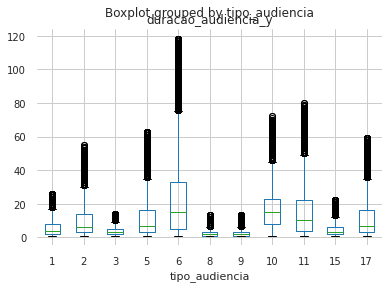

In [22]:
df_resultado.boxplot(column='duracao_audiencia_y', by='tipo_audiencia')

In [23]:
import datetime

In [24]:
# Criando uma coluna calculada com o atraso entre o horário programado e a hora de abertura
df_resultado['atraso_minutos'] = 'NaN'

In [25]:
df_resultado['atraso_minutos'] = df_resultado['atraso_minutos'].astype('float')

In [26]:
for index, row in df_resultado.iterrows():
  df_resultado.loc[index,'atraso_minutos'] = (datetime.datetime.strptime(df_resultado.loc[index, 'hora_abertura'], '%H:%M') - datetime.datetime.strptime(df_resultado.loc[index, 'dt_inicio_programada'][11:], '%H:%M')).total_seconds()/60

In [27]:
df_resultado.head()

,tipo_audiencia,duracao_audiencia_x,vara_trabalho,classe_processual,juiz,dt_inicio_programada,marcacao_automatica,hora_abertura,hora_encerramento,data_audiencia,dia_semana,sala_audiencia,municipio,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,assunto_pai,autor,tipo_documento_autor,reu,tipo_documento_reu,duracao_audiencia_y,atraso_minutos
0,1,26.0,863,HoTrEx,64921,01/02/2018 14:55,0,13:59,14:18,01/02/2018,5,71,4113700.0,1,7780.00,0,0,0,0,201.0,2439,1510,430750,CPJ,773025,CPF,19,-56.0
1,1,26.0,10,HoTrEx,195129,09/03/2018 08:40,0,08:55,09:12,09/03/2018,6,256,4106902.0,1,138245.79,0,0,0,0,1101.0,4995,4994,119237,CPJ,777183,CPF,17,15.0
2,1,26.0,10,HoTrEx,195129,09/03/2018 08:30,0,08:39,08:51,09/03/2018,6,256,4106902.0,1,70000.00,0,0,0,0,1001.0,1524,1510,73128,CPJ,771321,CPF,12,9.0
3,1,26.0,10,HoTrEx,195129,09/03/2018 08:50,0,09:13,09:23,09/03/2018,6,256,4106902.0,1,32000.00,0,1,0,0,1401.0,5143,5142,777699,CPF,777700,CPF,10,23.0
4,1,26.0,653,ATOrd,34664,02/03/2018 12:18,0,12:18,12:21,02/03/2018,6,74,4101507.0,0,50000.00,0,1,0,0,601.0,4957,4756,606824,CPF,606834,CPJ,3,0.0


In [28]:
df_resultado['atraso_minutos'].describe()

count    262900.000000
mean          7.821293
std          36.198133
min        -522.000000
25%           0.000000
50%           7.000000
75%          21.000000
max         486.000000
Name: atraso_minutos, dtype: float64

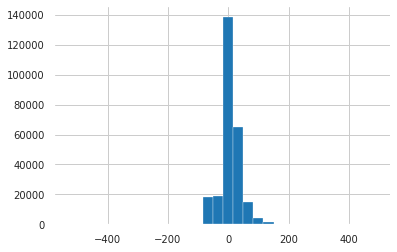

In [29]:
df_resultado['atraso_minutos'].hist(bins=30)

In [ ]:
profile_resultado = ProfileReport(df_resultado, title='Audiência',html={'style':{'full_width':True}})
profile_resultado.to_notebook_iframe()

In [30]:
df_resultado.query('atraso_minutos < (-400)').head(100)

,tipo_audiencia,duracao_audiencia_x,vara_trabalho,classe_processual,juiz,dt_inicio_programada,marcacao_automatica,hora_abertura,hora_encerramento,data_audiencia,dia_semana,sala_audiencia,municipio,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,assunto_pai,autor,tipo_documento_autor,reu,tipo_documento_reu,duracao_audiencia_y,atraso_minutos
759,1,26.0,322,ATOrd,55019,08/05/2018 16:00,0,08:50,08:57,08/05/2018,3,37,4118204.0,0,50000.00,0,1,0,0,107.0,1508,1516,476736,CPF,406780,CPJ,7,-430.0
848,1,26.0,322,ATOrd,55019,24/05/2018 16:00,0,08:48,08:52,24/05/2018,5,37,4115705.0,0,150000.00,0,1,0,0,1005.0,1515,1466,470333,CPF,221442,CPJ,4,-432.0
893,1,26.0,322,ACum,55019,17/05/2018 16:10,0,08:45,08:49,17/05/2018,5,37,4118204.0,1,2049.30,0,0,0,0,103.0,1462,1454,271849,CPJ,773127,CPJ,4,-445.0
932,1,26.0,322,ATOrd,55019,22/05/2018 16:00,0,08:38,08:41,22/05/2018,3,37,4118204.0,0,38000.00,0,1,0,0,1002.0,4873,4760,262777,CPF,54086,CPJ,3,-442.0
1126,1,26.0,322,ATOrd,55019,05/06/2018 16:00,0,08:52,08:58,05/06/2018,3,37,4118204.0,0,50000.00,0,1,0,0,1401.0,4852,4751,289207,CPF,107732,CPJ,6,-428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176384,6,118.0,322,ATOrd,55019,16/05/2019 16:20,0,08:38,08:40,16/05/2019,5,37,4118204.0,1,131765.12,0,1,0,0,1002.0,1532,1472,848262,CPF,9513,CPJ,2,-462.0
191437,6,118.0,322,ATOrd,55019,08/10/2019 17:02,0,10:15,11:15,08/10/2019,3,37,4118204.0,1,48671.46,0,1,0,0,1005.0,1131,1129,1101033,CPF,1101122,CPF,60,-407.0
221507,10,72.0,91,CartPrecCiv,159511,12/03/2019 17:00,0,08:50,09:19,12/03/2019,3,230,4104808.0,1,0.01,0,1,0,0,1101.0,5083,5076,728251,CPF,11934,CPJ,29,-490.0
228789,11,80.0,322,ATSum,486279,23/10/2019 18:35,0,11:22,11:28,23/10/2019,4,37,4106902.0,1,34185.00,0,1,0,0,1401.0,2317,2314,1184607,CPF,1008751,CPJ,6,-433.0


In [32]:
df_municipio.dtypes

UF                    object
NOME DO MUNICÍPIO     object
POPULAÇÃO ESTIMADA    object
COD MUNICIPIO          int64
dtype: object

In [33]:
df_municipio.describe()

,COD MUNICIPIO
count,5.570000e+03
mean,3.253591e+06
std,9.849103e+05
min,1.100015e+06
25%,2.512126e+06
50%,3.146280e+06
75%,4.119190e+06
max,5.300108e+06


In [34]:
df_municipio.rename(columns={'COD MUNICIPIO': 'municipio'}, inplace = True)

In [35]:
df_municipio.dtypes

UF                    object
NOME DO MUNICÍPIO     object
POPULAÇÃO ESTIMADA    object
municipio              int64
dtype: object

In [36]:
df_resultado.dtypes

tipo_audiencia                int64
duracao_audiencia_x         float64
vara_trabalho                 int64
classe_processual            object
juiz                          int64
dt_inicio_programada         object
marcacao_automatica           int64
hora_abertura                object
hora_encerramento            object
data_audiencia               object
dia_semana                    int64
sala_audiencia                int64
municipio                   float64
apos_reforma_trabalhista      int64
valor_causa                 float64
segredo_justica               int64
justica_gratuita              int64
tutela_liminar                int64
prioridade                    int64
atividade_economica         float64
assunto                       int64
assunto_pai                   int64
autor                         int64
tipo_documento_autor         object
reu                           int64
tipo_documento_reu           object
duracao_audiencia_y           int64
atraso_minutos              

In [37]:
df_resultado['municipio'] = df_resultado['municipio'].astype('int64')

In [38]:
df_resultado.dtypes

tipo_audiencia                int64
duracao_audiencia_x         float64
vara_trabalho                 int64
classe_processual            object
juiz                          int64
dt_inicio_programada         object
marcacao_automatica           int64
hora_abertura                object
hora_encerramento            object
data_audiencia               object
dia_semana                    int64
sala_audiencia                int64
municipio                     int64
apos_reforma_trabalhista      int64
valor_causa                 float64
segredo_justica               int64
justica_gratuita              int64
tutela_liminar                int64
prioridade                    int64
atividade_economica         float64
assunto                       int64
assunto_pai                   int64
autor                         int64
tipo_documento_autor         object
reu                           int64
tipo_documento_reu           object
duracao_audiencia_y           int64
atraso_minutos              

In [39]:
df_audiencia_municipio=pd.merge(df_municipio, df_resultado, on = 'municipio')

In [45]:
df_audiencia_municipio.UF.value_counts()

PR    260008
SP       927
SC       623
RS       312
MG       196
RJ       168
MS       141
MT        84
BA        76
PA        51
PE        46
GO        40
ES        38
CE        28
RO        28
DF        22
SE        18
MA        18
PB        18
AM        15
TO        13
AL        11
RN        11
PI         6
AP         2
Name: UF, dtype: int64

In [46]:
df_audiencia_municipio.dtypes

UF                           object
NOME DO MUNICÍPIO            object
POPULAÇÃO ESTIMADA           object
municipio                     int64
tipo_audiencia                int64
duracao_audiencia_x         float64
vara_trabalho                 int64
classe_processual            object
juiz                          int64
dt_inicio_programada         object
marcacao_automatica           int64
hora_abertura                object
hora_encerramento            object
data_audiencia               object
dia_semana                    int64
sala_audiencia                int64
apos_reforma_trabalhista      int64
valor_causa                 float64
segredo_justica               int64
justica_gratuita              int64
tutela_liminar                int64
prioridade                    int64
atividade_economica         float64
assunto                       int64
assunto_pai                   int64
autor                         int64
tipo_documento_autor         object
reu                         

In [53]:
df_audiencia_municipio=df_audiencia_municipio.drop(['duracao_audiencia_x'], axis=1)

In [54]:
df_audiencia_municipio.rename(columns={'NOME DO MUNICÍPIO': 'nome_municipio', 'UF':'uf_municipio', 'POPULAÇÃO ESTIMADA':'populacao_estimada2019_municipio'}, inplace = True)

In [55]:
df_audiencia_municipio.rename(columns={'duracao_audiencia_y': 'duracao_audiencia'}, inplace = True)

In [56]:
df_audiencia_municipio=df_audiencia_municipio.drop(['atraso_minutos'], axis=1)

In [57]:
df_audiencia_municipio.head(10)

,uf_municipio,nome_municipio,populacao_estimada2019_municipio,municipio,tipo_audiencia,vara_trabalho,classe_processual,juiz,dt_inicio_programada,marcacao_automatica,hora_abertura,hora_encerramento,data_audiencia,dia_semana,sala_audiencia,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,assunto_pai,autor,tipo_documento_autor,reu,tipo_documento_reu,duracao_audiencia
0,RO,Cacoal,85359,1100049,10,863,CartPrecCiv,64921,04/09/2018 14:00,0,14:15,14:20,04/09/2018,3,71,1,0.01,0,0,0,0,1402.0,5083,5076,554672,CPF,863690,CPJ,5
1,RO,Cacoal,85359,1100049,10,1465,CartPrecCiv,174280,20/11/2018 14:50,0,14:05,14:10,20/11/2018,3,149,1,300000.00,0,0,0,0,201.0,5083,5076,529280,CPF,47786,CPJ,5
2,RO,Guajará-Mirim,46174,1100106,5,659,ATOrd,195134,18/02/2019 14:10,0,14:38,14:53,18/02/2019,2,29,1,38203.21,0,1,0,0,603.0,1530,1516,970398,CPF,970401,CPJ,15
3,RO,Ji-Paraná,128969,1100122,10,20,CartPrecCiv,7711,08/07/2019 09:00,0,09:10,09:18,08/07/2019,2,236,1,0.01,0,0,0,0,701.0,5083,5076,1140000,CPF,1140002,CPJ,8
4,RO,Porto Velho,529544,1100205,2,653,ETCiv,100086,31/05/2019 11:20,0,12:55,12:58,31/05/2019,6,165,1,1000.00,0,0,0,0,201.0,5079,5077,860039,CPF,253308,CPF,3
5,RO,Porto Velho,529544,1100205,3,84,ATOrd,281150,23/05/2018 14:05,0,14:33,14:35,23/05/2018,4,288,1,1100492.77,0,1,0,0,1005.0,4957,4756,756356,CPF,329578,CPJ,2
6,RO,Porto Velho,529544,1100205,3,29,ATOrd,141899,10/04/2019 13:30,0,13:41,13:44,10/04/2019,4,49,1,148635.80,0,1,0,0,1001.0,1517,1516,1010606,CPF,329578,CPJ,3
7,RO,Porto Velho,529544,1100205,5,658,ConPag,7467,21/05/2019 15:45,0,15:39,16:11,21/05/2019,3,155,1,4023.55,0,0,0,0,110.0,4670,1521,8369,CPJ,983482,CPF,32
8,RO,Porto Velho,529544,1100205,5,658,ATOrd,7467,17/06/2019 15:35,0,15:37,15:41,17/06/2019,2,155,1,180164.46,0,0,0,0,110.0,4957,4756,975379,CPF,975389,CPJ,4
9,RO,Porto Velho,529544,1100205,5,658,ATOrd,7467,03/09/2019 14:50,0,14:50,14:51,03/09/2019,3,155,1,180164.46,0,0,0,0,110.0,4957,4756,975379,CPF,975389,CPJ,1


In [58]:
df_audiencia_municipio.count()


uf_municipio                        262900
nome_municipio                      262900
populacao_estimada2019_municipio    262900
municipio                           262900
tipo_audiencia                      262900
vara_trabalho                       262900
classe_processual                   262900
juiz                                262900
dt_inicio_programada                262900
marcacao_automatica                 262900
hora_abertura                       262900
hora_encerramento                   262900
data_audiencia                      262900
dia_semana                          262900
sala_audiencia                      262900
apos_reforma_trabalhista            262900
valor_causa                         262900
segredo_justica                     262900
justica_gratuita                    262900
tutela_liminar                      262900
prioridade                          262900
atividade_economica                 262900
assunto                             262900
assunto_pai

In [62]:
df_audiencia_municipio=df_audiencia_municipio.drop(['nome_municipio','dt_inicio_programada', 'hora_abertura', 'hora_encerramento', 'data_audiencia'], axis=1)

In [63]:
df_audiencia_municipio.to_csv('sample_data/audiencia_processada.csv', encoding='CP1252')
